![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)
# LOK and SLK benchmark


### Background
**LOK** (STK10) is involved in multiple signaling pathways, including the p38 mitogen-activated protein kinase (MAPK) pathway. 
research on STK10 as a therapeutic target was still in its early stages. Preclinical studies in cell lines and animal models might have been conducted to investigate the effects of STK10 inhibition on tumor growth and other cellular processes

**SLK** (STE20-like kinase) is a serine/threonine kinase that belongs to the STE20 family of kinases. It plays a role in various cellular processes, including cell cycle progression, cytoskeletal organization, and cell migration. 

### Benchmarking

**SLK** and **STK10** are serine/threonine kinases whose major known function is activating the ERM (ezrin/radixin/moesin) proteins by phosphorylation on a conserved threonine residue near the C-terminus (moesin Thr558). Inhibition of STK10/SLK appears to primarily affect cell migration by suppressing p38 MAPK signaling and attenuating ERM protein activation. This potential therapeutic approach warrants further exploration for its effectiveness in the treatment of diseases characterized by abnormal cell migration, such as certain cancers. 

The goal of this benchmark is to select the best predictive model for 
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.



### Description of readout 
- **Readouts**: `LOK`, `SLK`
- **Bioassay readout**: percentage of inhibition.
- **Optimization objective**: Higher inhibition


### Data resource: 
- **Reference**: [PKIS2](https://www.ncbi.nlm.nih.gov/pubmed/28767711)

### Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
import pandas as pd
import datamol as dm
import numpy as np
from sklearn.model_selection import ShuffleSplit
import polaris
from polaris.curation._chemistry_curator import SMILES_COL, UNIQUE_ID
from polaris.dataset import Dataset, ColumnAnnotation
from polaris.benchmark import SingleTaskBenchmarkSpecification, MultiTaskBenchmarkSpecification
import warnings
warnings.filterwarnings("ignore")
import os
import pathlib
os.chdir(pathlib.Path("__file__").absolute().parents[2])
from utils import *

In [2]:
BENCHMARK_DIR = "gs://polaris-public/benchmarks/kinases/lok_slk"
FIGURE_DIR = "gs://polaris-public/datasets/kinases/lok_slk/figures"

## Load existing dataset object
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 
> See more curation details in [here](https://github.com/polaris-hub/polaris-recipes/blob/mvp/03_Kinases/LOK_SLK).


In [3]:
dataset = polaris.load_dataset("gs://polaris-public/datasets/kinases/pkis2_subset_curated /pkis2_egfr_ret_kit_lok_slk_v1/dataset.json")

In [4]:
# Display dataset
dataset

{
  "name": "pkis2_egfr_ret_kit_lok_slk_v1",
  "description": "A subset of PKIS 2 dataset only including EGFR, RET, KIT, LOK and SLK kinases. Profile of kinases PKIS2 which contains 640 small molecule for 468 kinases.",
  "tags": [
    "Kinase",
    "HitDiscovery",
    "Selectivity"
  ],
  "user_attributes": {},
  "owner": {
    "slug": "polaristest",
    "organization_id": "PolarisTest",
    "user_id": null,
    "owner": "PolarisTest"
  },
  "md5sum": "e221702e985aafa8859d279addb6d39f",
  "readme": "![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n## Backgroud:\n Kinases play a crucial role in cellular signalling, making them important targets for drug development. Dysregulation of kinases is frequently implicated in diseases like cancer, inflammation, and neurodegenerative disorders. Therefore, targeting kinases with specific drugs has emerged as a crucial strategy in modern drug discovery. Kinase-related task includes inhibition prediction, selectivity prediction, or kinase-ligand binding affinity prediction. In the early release version of Polaris, benchmarks were established for kinases such as EGFR, KIT, and RET, along with their respective mutations, as well as for LOK and SLK.\n\n\n## Description of readout \n- **Readouts**: `EGFR`, `KIT`, `RET`, `LOK`, `SLK`\n- **Bioassay readout**: Percentage of inhibition (%).\n- **Optimization objective**: Higher potency (higher %inhibition).\n\n\n## Data resource:\nPKIS2: A second chemogenomics set of kinase inhibitors from GSK, Takeda, and Pfizer was assembled as PKIS2. This set contained 645 inhibitors and included many additional chemotypes that were not represented in the original set.\n\n**Reference**: https://www.ncbi.nlm.nih.gov/pubmed/28767711\n\n<!-- ## Related benchmarks -->\n<!-- TODO: to be added -->\n\n<!-- ## Related benchmarks\nTODO: to be added -->",
  "annotations": {
    "UNIQUE_ID": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {}
    },
    "smiles": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": null,
      "user_attributes": {}
    },
    "EGFR": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "None",
        "target": "EGFR"
      }
    },
    "KIT": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "None",
        "target": "KIT"
      }
    },
    "LOK": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "None",
        "target": "LOK"
      }
    },
    "RET": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "None",
        "target": "RET"
      }
    },
    "SLK": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "None",
        "target": "SLK"
      }
    },
    "CLASS_EGFR": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "

In [5]:
# data columns
data_cols = ['LOK', 'SLK']

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-validation-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [6]:
from polaris.utils.types import HubOwner
owner = HubOwner(organizationId="PolarisTest", slug="polaristest")
owner.owner

'PolarisTest'

### Create scaffold split for `LOK_SLK` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [7]:
# scaffold split
from partitio._scaffold_split import ScaffoldSplit
flag = True
TEST_SIZE = 0.2
SEED = 128
splitter = ScaffoldSplit(smiles=dataset.table.smiles.values, n_jobs=-1, test_size=TEST_SIZE, random_state=SEED)
scaffold_split = next(splitter.split(X=dataset.table.smiles.values))

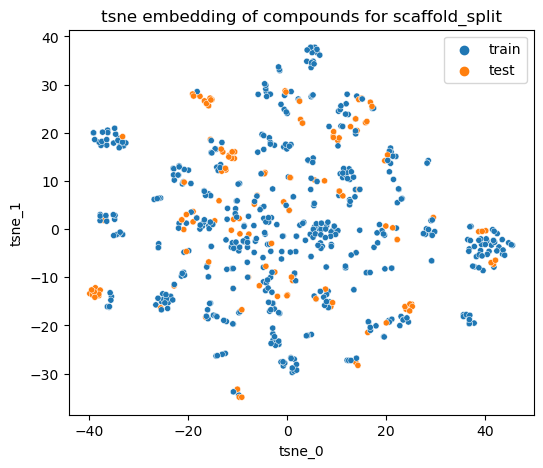

In [8]:
from utils import display_chemspace
data_name = "drewry_lok_slk_v1"
fig = display_chemspace(dataset.table.copy(), 'smiles', split =scaffold_split, 
                   split_name="scaffold_split")
method = "tnse"
save_figure(fig,remote_path=f"{FIGURE_DIR}/{data_name}_{method}_scaffold_split.png", 
            local_path=f"figures/{data_name}_{method}_scaffold_split.png" )

## Single task for LOK, SLK with scaffold split 

**Regression tasks**

In [9]:
benchmark_name =f"drewry_lok_slk_multitask_reg_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
data_cols = ['LOK', 'SLK']
benchmark_reg = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=["mean_absolute_error",
            "mean_squared_error",
            "r2",
            "spearmanr",
            "pearsonr",
            "explained_var"], 
    tags=["Kinase","SingleTask", "Regression", "HitDiscovery"],
    description="Multitask regression benchmark for LOK and SLK wild type.", 
    owner=owner, 
    readme=load_readme(f"gs://polaris-public/readme/benchmarks/{benchmark_name}_readme.md")

)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/lok_slk/drewry_lok_slk_multitask_reg_v1/benchmark.json


**Classification tasks**

In [10]:
data_cols = ['CLASS_LOK', 'CLASS_SLK']
benchmark_name =f"drewry_lok_slk_multitask_clf_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_clf = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="f1_macro",
    metrics=["accuracy", "f1","f1_macro", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=["Kinase", "SingleTask", "Classification", "HitDiscovery"],
    description="Multitask classification benchmark for LOK and SLK wild type.", 
    owner=owner, 
    readme=load_readme(f"gs://polaris-public/readme/benchmarks/{benchmark_name}_readme.md")

)
path = benchmark_clf.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/lok_slk/drewry_lok_slk_multitask_clf_v1/benchmark.json
